# StockX Data Contest 2019 
Kayleigh James, jamesmk@umich.edu
## Import Data and Clean


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pytrends.request import TrendReq

plt.style.use('seaborn-darkgrid')
df = pd.read_excel('StockX-Data-Contest-2019-3.xlsx',error_bad_lines=False) 
df.head(10)

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097.0,220,2016-09-24,11.0,California
1,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685.0,220,2016-11-23,11.0,California
2,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690.0,220,2016-11-23,11.0,California
3,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075.0,220,2016-11-23,11.5,Kentucky
4,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828.0,220,2017-02-11,11.0,Rhode Island
5,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,798.0,220,2017-02-11,8.5,Michigan
6,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-White,784.0,220,2016-12-17,11.0,California
7,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Cream-White,460.0,220,2017-04-29,10.0,New York
8,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Cream-White,465.0,220,2017-04-29,11.0,Kansas
9,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Cream-White,465.0,220,2017-04-29,11.0,Florida


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99956 entries, 0 to 99955
Data columns (total 8 columns):
Order Date      99956 non-null datetime64[ns]
Brand           99956 non-null object
Sneaker Name    99956 non-null object
Sale Price      99956 non-null float64
Retail Price    99956 non-null int64
Release Date    99956 non-null datetime64[ns]
Shoe Size       99956 non-null float64
Buyer Region    99956 non-null object
dtypes: datetime64[ns](2), float64(2), int64(1), object(3)
memory usage: 6.1+ MB


In [3]:
df["Profit"] = df["Sale Price"] - df["Retail Price"]
df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Profit
0,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097.0,220,2016-09-24,11.0,California,877.0
1,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685.0,220,2016-11-23,11.0,California,465.0
2,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690.0,220,2016-11-23,11.0,California,470.0
3,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075.0,220,2016-11-23,11.5,Kentucky,855.0
4,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828.0,220,2017-02-11,11.0,Rhode Island,608.0


Need to convert the object types into categorical types.

In [4]:
df['Brand'] = pd.Categorical(df['Brand'])
df['Sneaker Name'] = pd.Categorical(df['Sneaker Name'])
df['Buyer Region'] = pd.Categorical(df['Buyer Region'])
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y %I:%M:%S %p')
df.index = pd.DatetimeIndex(df['Order Date']) #make date the index of the data
df.info() #check to make sure columns are all the correct data types

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 99956 entries, 2017-09-01 to 2019-02-13
Data columns (total 9 columns):
Order Date      99956 non-null datetime64[ns]
Brand           99956 non-null category
Sneaker Name    99956 non-null category
Sale Price      99956 non-null float64
Retail Price    99956 non-null int64
Release Date    99956 non-null datetime64[ns]
Shoe Size       99956 non-null float64
Buyer Region    99956 non-null category
Profit          99956 non-null float64
dtypes: category(3), datetime64[ns](2), float64(3), int64(1)
memory usage: 5.6 MB


## Exploratory Data Analysis

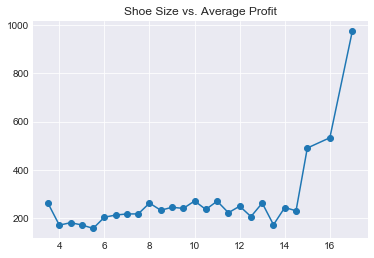

In [20]:
df2 = df.drop(['Order Date','Brand','Sneaker Name', 'Sale Price','Retail Price', 'Release Date', 'Buyer Region'], axis=1)
df2 = df2.groupby('Shoe Size', as_index=False)['Profit'].mean()
sns.set_style("darkgrid")
plt.title("Shoe Size vs. Average Profit")
plt.plot( 'Shoe Size', 'Profit', data=df2, linestyle='-', marker='o')
plt.show()

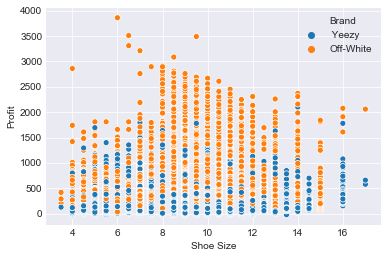

In [34]:
df3 = df.drop(['Order Date','Sneaker Name', 'Sale Price','Retail Price', 'Release Date', 'Buyer Region'], axis=1)
df3.head()

ax = sns.scatterplot(x="Shoe Size", y="Profit", hue="Brand",data = df3)
